In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
image_resolution = 384

In [3]:
# load the dataset
image_path = "Car1Rotations/car1_{}_{}.png".format(image_resolution, 0)
digits = datasets.load_digits()
data = []
data2 = []
for i in range(360):
    image_path1 = "Car1Rotations/car1_{}_{}.png".format(image_resolution, i)
    image_path2 = "Car2Rotations/car2_{}_{}.png".format(image_resolution, i)
    img1 = plt.imread(image_path1)
    img2 = plt.imread(image_path2)
    rgb_weights = [0.2989, 0.5870, 0.1140]
    grayscale_img1 = np.dot(img1, rgb_weights)
    grayscale_img2 = np.dot(img2, rgb_weights)
    img_flat1 = grayscale_img1.flatten()
    img_flat2 = grayscale_img2.flatten()
    data.append(img_flat1)
    data2.append(img_flat2)

In [4]:
data = np.array(data)
data2 = np.array(data2)
target = []
for i in range(360):
    target.append(int(i/10))
target = np.array(target)
print('Shape of dataset1: {}\nand shape of dataset2:{}\n and target: {}'.format(data.shape, data2.shape, target.shape))

Shape of dataset1: (360, 147456)
and shape of dataset2:(360, 147456)
 and target: (360,)


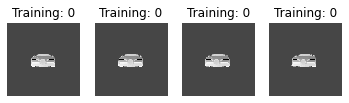

In [5]:
#plot the data, which is just the images flattened into a 1-d array
for i in range(0, 4):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    imside = int(np.sqrt(data[i,].shape[0]))
    im1 = np.reshape(data[i,], (imside, imside))
    plt.imshow(im1, cmap=plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Training: {}'.format(target[i]))
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data,target,random_state=0)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape, y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape, y_test.shape))

Training data and target sizes: 
(270, 147456), (270,)
Test data and target sizes: 
(90, 147456), (90,)


In [7]:
# Create a classifier: a support vector classifier
classifier = SVC(gamma = 0.001)
#fit to the training data
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [8]:
# now to predict the value of the rotation on the test data
y_pred = classifier.predict(X_test)

In [9]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(y_test, y_pred)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.33      1.00      0.50         1
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         5
           6       1.00      0.80      0.89         5
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         1
           9       0.50      1.00      0.67         2
          10       1.00      0.50      0.67         4
          11       0.67      1.00      0.80         2
          12       1.00      0.75      0.86         4
          13       0.75      1.00      0.86         3
          14       1.00      0.75      0.86         4
          15       1.00      1.00      1.00         2
          16       0.50   

In [11]:
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % conf_mat)
np.set_printoptions(threshold=np.inf)
print(conf_mat.shape)

Confusion matrix:
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 2 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
(35, 35)
